In [2]:
import json
from matplotlib import pyplot as plt
from copy import deepcopy

In [3]:
# dict of subjects (keys) and the list of publications they appear in (values).
types = json.load(open('../../../data/json/dim/all/relevant_types.json'))
type_clusters = json.load(open('../../oai_dc/types/clustered_types.json'))
depositonce = json.load(open('../../../data/json/dim/depositonce/relevant_subjects_reversed.json'))
edoc = json.load(open('../../../data/json/dim/edoc/relevant_subjects_reversed.json'))
refubium = json.load(open('../../../data/json/dim/refubium/relevant_subjects_reversed.json'))
all = {(s['subject'], s['type']): deepcopy(s['values']) for s in depositonce}
for repo in (edoc, refubium):
    for s in repo:
        if (s['subject'], s['type']) in all:
            all[(s['subject'], s['type'])] += s['values']
        else:
            all[(s['subject'], s['type'])] = s['values']

In [4]:
ddc = {k[0]: v for k, v in all.items() if k[1] == 'ddc'}

In [5]:
def is_ddc(n):
  """ True if the given number (string) complies with the DDC format. """
  return '.' in n and len(n.split('.')[0]) == 3 or \
      '.' not in n and len(n) == 3

In [6]:
def get_avg(terms):
    """Return the avg. number of documents per term in the dict. """
    return round(sum([len(v) for v in terms.values()]) / len(terms), 2)

In [7]:
classes, subclasses, more_specific, undefined = {}, {}, {}, {}
for term, values in ddc.items():
    if term[-2:] == '00':
        classes[term] = values
    elif term[-1:] == '0':
        subclasses[term] = values
    elif is_ddc(term):
        more_specific[term] = values
    else:
        undefined[term] = values
print(f'Out of the {len(ddc)} distinct DDC terms:')
print(f'\t{len(classes)} are classes, i.e the number ends in 00. These terms are assigned to {get_avg(classes)} documents on avg.')
print(f'\t{len(subclasses)} are subclasses, i.e the number ends in 0. These terms a to {get_avg(subclasses)} documents on avg.')
print(f'\t{len(more_specific)} are more specific than that. These terms are assigned to {get_avg(more_specific)} documents on avg.')
print(f'\t{len(undefined)} are not DDC numbers. These terms are assigned to {get_avg(undefined)} documents on avg.')

Out of the 390 distinct DDC terms:
	10 are classes, i.e the number ends in 00. These terms are assigned to 226.0 documents on avg.
	71 are subclasses, i.e the number ends in 0. These terms a to 272.83 documents on avg.
	302 are more specific than that. These terms are assigned to 20.38 documents on avg.
	7 are not DDC numbers. These terms are assigned to 1.14 documents on avg.


How are DDC terms overall distributed among the classes?

In [8]:
groups = {str(i): [] for i in range(10)}
for term in ddc:
    if term[0] in groups:
        groups[term[0]] += ddc[term]

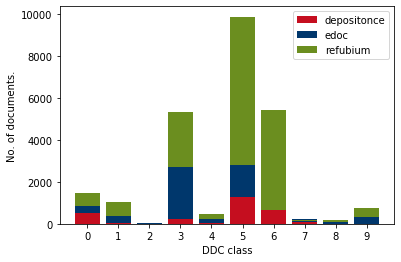

In [9]:
tu_vals = [sum(['depositonce' in doc for doc in v]) for v in groups.values()]
hu_vals = [sum(['edoc' in doc for doc in v]) for v in groups.values()]
fu_vals = [sum(['refubium' in doc for doc in v]) for v in groups.values()]
plt.bar(range(10), tu_vals, label='depositonce', color='#c50e1f')
plt.bar(range(10), hu_vals, label='edoc', color='#00376c', bottom=tu_vals)
plt.bar(range(10), fu_vals, label='refubium', color='#6b8e1f', bottom=hu_vals)
plt.legend()
plt.xticks(range(10))
plt.xlabel('DDC class')
plt.ylabel('No. of documents.')
plt.show()

Let's have a closer look at the more specific terms. Is there any overlap among their documents? How are they distributed among the classes?